# Numerical Methods For Ordinary Differential Equations

Here we give methods to solve the following initial-value problem of an ordinary differential equation:

$$
\tag{1}
\left\{
\begin{aligned}
\frac{dx}{dt} &= f(x,t) \\
x(t_0) &= x_0
\end{aligned}
\right.
$$

The methods will use a computational grid:

$$
\tag{2}
t_n = t_0 + nh
$$
where $h$ is the grid size.

In [24]:
r = 0.15
K = 100
t0 = 0
tf = 1
x0 = 1
step_size =  0.1

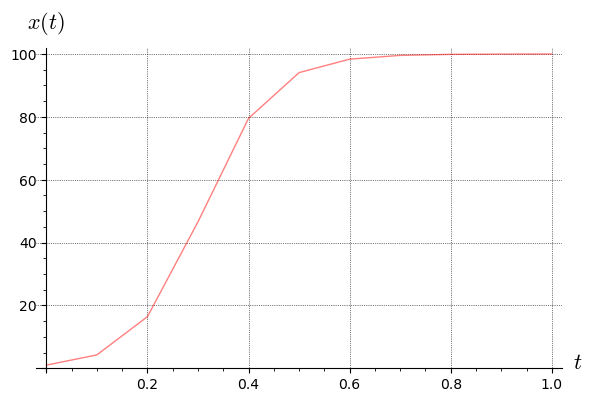

In [25]:
t,x = var('t x')
solution = desolve_rk4( r*x*(K-x), x, ivar = t, ics=[t0,x0], end_points=tf, step=step_size)
sage_solution = list_plot(solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, alpha=0.5, color="red")
sage_solution.show()

In [26]:
def euler_method(f, x0, t0, t_end, h):
    """
    Implements the Euler method for solving x' = f(t, x)

    Parameters:
        f: a function of (t, x)
        x0: initial value x(t0)
        t0: initial time
        t_end: final time
        h: step size

    Returns:
        A list of (t, x) points
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        x = x + h * f(t, x)
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))

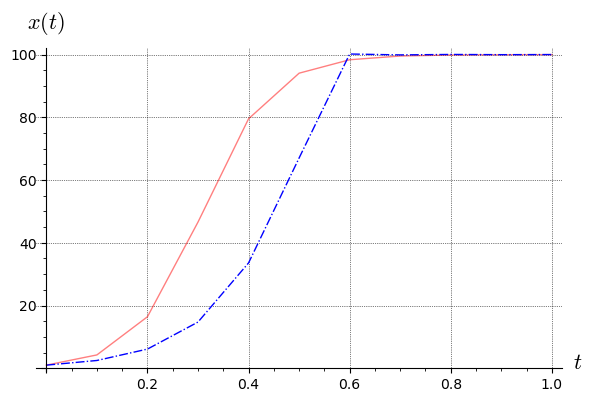

In [27]:
t, x = var('t x')
f(t, x) = r * x * (K - x)  # logistic equation

solution = euler_method(f, x0=x0, t0=t0, t_end=tf, h=step_size)

# Plot
euler_solution = list_plot(solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_euler = sage_solution + euler_solution
compare_euler.plot()



In [28]:
def modified_euler_method(f, x0, t0, t_end, h):
    """
    Implements the Modified Euler method (Heun's Method) for solving x' = f(t, x)

    Parameters:
        f: a function of (t, x)
        x0: initial value x(t0)
        t0: initial time
        t_end: final time
        h: step size

    Returns:
        A list of (t, x) points
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        k1 = h*f(t, x)
        k2 = h*f(t + h, x + k1)
        x = x + 1/2 * (k1 + k2)
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))


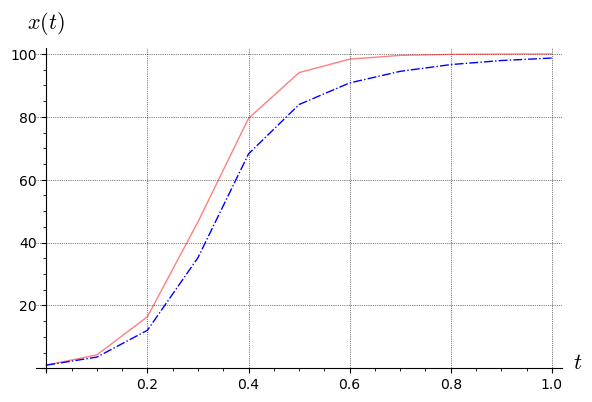

In [29]:
solution = modified_euler_method(f, x0=x0, t0=t0, t_end=tf, h=step_size)

# Plot the numerical approximation
heun_solution = list_plot(solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = sage_solution + heun_solution
compare_heun.plot()


In [30]:
def rk2_general_form(f, x0, t0, t_end, h=0.01,
                       alpha=1/2, beta=1/2, a=0, b=1):
    """
    General second-order Runge-Kutta method using parameters alpha, beta, a, b.

    Solves x' = f(t, x) over [t0, t_end] with initial condition x(t0) = x0.

    Parameters:
        f: right-hand side function f(t, x)
        x0: initial condition x(t0)
        t0: initial time
        t_end: final time
        h: time step size
        alpha: time increment coefficient for k2
        beta: slope coefficient for k2
        a, b: weights for k1 and k2 in the update

    Returns:
        List of (t, x) points approximating the solution
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        k1 = h * f(t, x)
        k2 = h * f(t + alpha * h, x + beta * k1)
        x = x + a * k1 + b * k2
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))


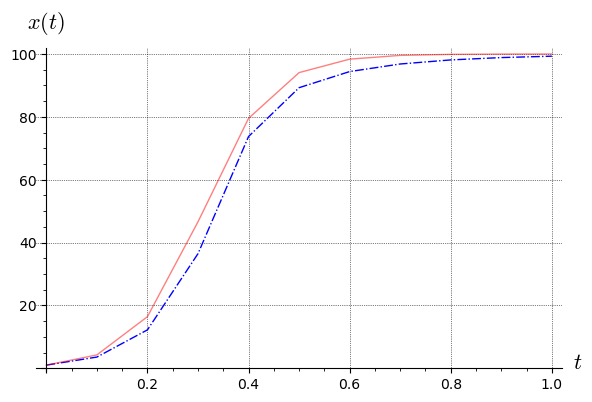

In [31]:
sol = rk2_general_form(f, x0=x0, t0=t0, t_end=tf, h=step_size)

heun_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = heun_solution  + sage_solution
compare_heun.plot()



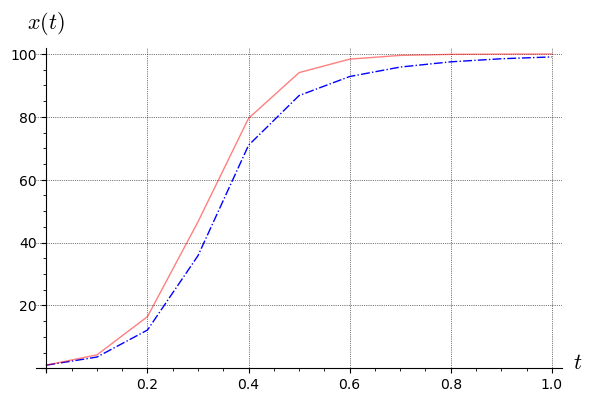

In [32]:
sol = rk2_general_form(f, x0=x0, t0=t0, t_end=tf, h=step_size, alpha=3/4, beta=3/4, a=1/3, b=2/3)

ralston_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = ralston_solution  + sage_solution
compare_heun.plot()


In [33]:
def rk4(f, x0, t0, t_end, h=0.01):
    """
    Fourth-order Runge-Kutta method as specified in the image.
    
    Solves x' = f(t, x) over [t0, t_end] with initial condition x(t0) = x0.
    
    Parameters:
        f: right-hand side function f(t, x)
        x0: initial condition x(t0)
        t0: initial time
        t_end: final time
        h: time step size (Δt)
        
    Returns:
        List of (t, x) points approximating the solution
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]
    
    t = t0
    x = x0
    
    for _ in range(steps):
        # Calculate the four k values according to the formulas
        k1 = h * f(t, x)
        k2 = h * f(t + 0.5 * h, x + 0.5 * k1)
        k3 = h * f(t + 0.5 * h, x + 0.5 * k2)
        k4 = h * f(t + h, x + k3)
        
        # Update x using the weighted average
        x = x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        
        # Increment time
        t = t + h
        
        # Store results
        t_vals.append(t)
        x_vals.append(x)
    
    return list(zip(t_vals, x_vals))

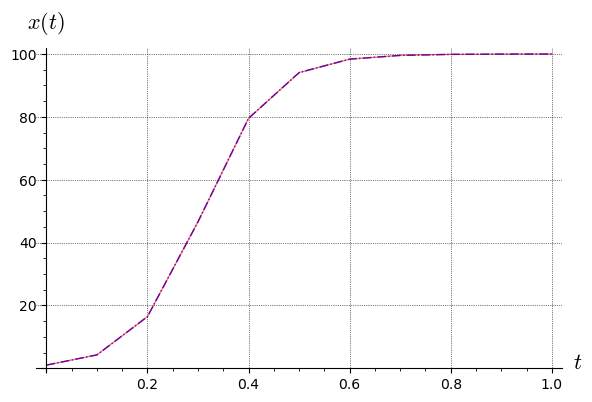

In [34]:
sol = rk4(f, x0=x0, t0=t0, t_end=tf, h=step_size)

ralston_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = ralston_solution  + sage_solution
compare_heun.plot()